In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

IMPORT DATA

In [5]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date" , parse_dates=True)

CLEAN DATA 

In [6]:
df = df[ df["value"].between( df["value"].quantile(.025), df["value"].quantile(.975) ) ]
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

DRAWING LINE PLOT

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Page Views')]

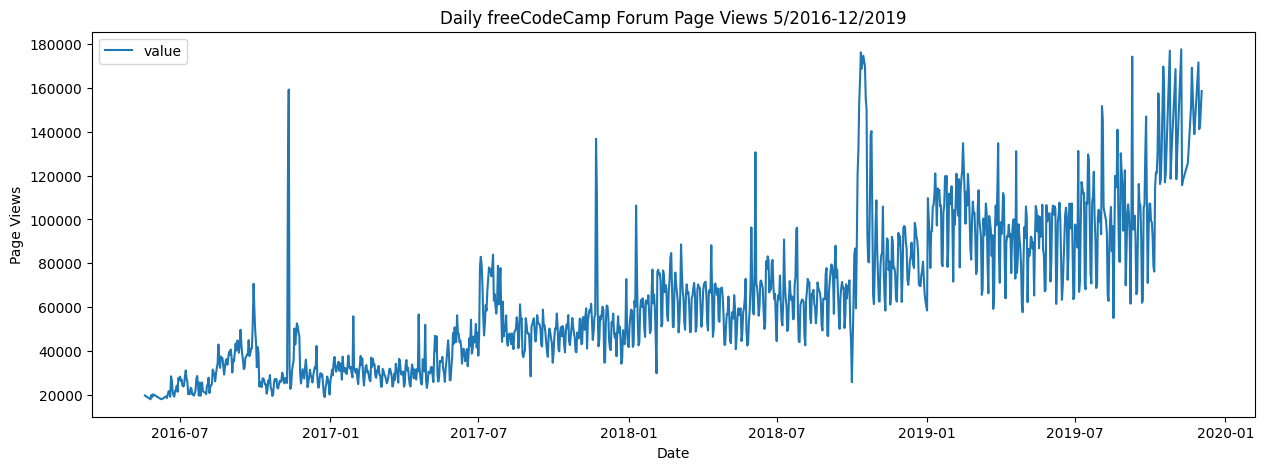

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(data = df, legend="brief")
ax.set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set(xlabel = "Date",ylabel = "Page Views")

DRAWING BAR PLOT

C:\Users\user\AppData\Local\Temp\ipykernel_7844\1840289157.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="year", hue="month", y="value", data=df_bar, hue_order = months, ci=None )


[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Average Page Views')]

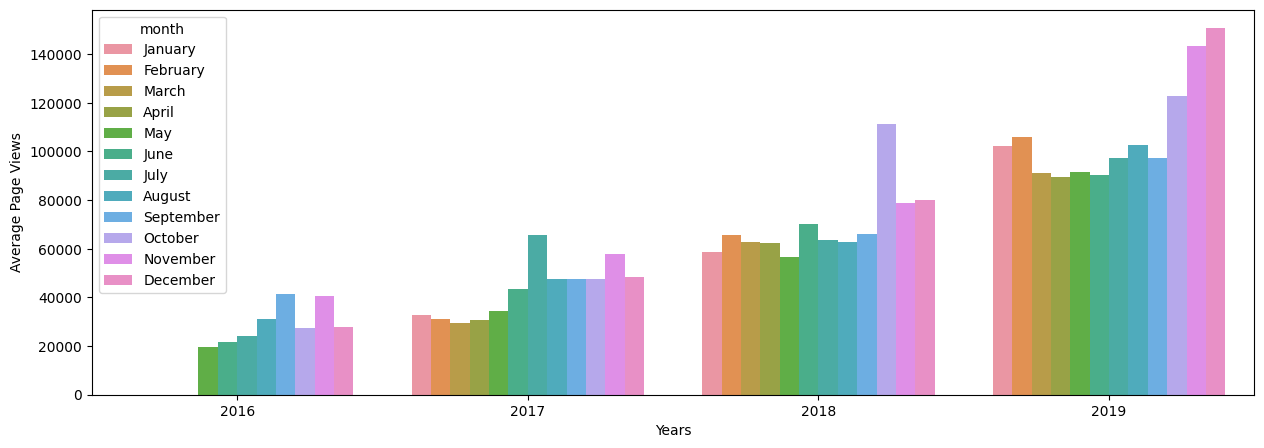

In [9]:
#Modifying data for monthly bar plot
df_bar = df.copy()
df_bar["year"] = df.index.year.values
df_bar["month"] = df.index.month_name()

fig, ax = plt.subplots(figsize=(15,5))
    
ax = sns.barplot(x="year", hue="month", y="value", data=df_bar, hue_order = months, ci=None )
ax.set(xlabel = "Years",ylabel = "Average Page Views")

DRAWING BOX PLOT

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

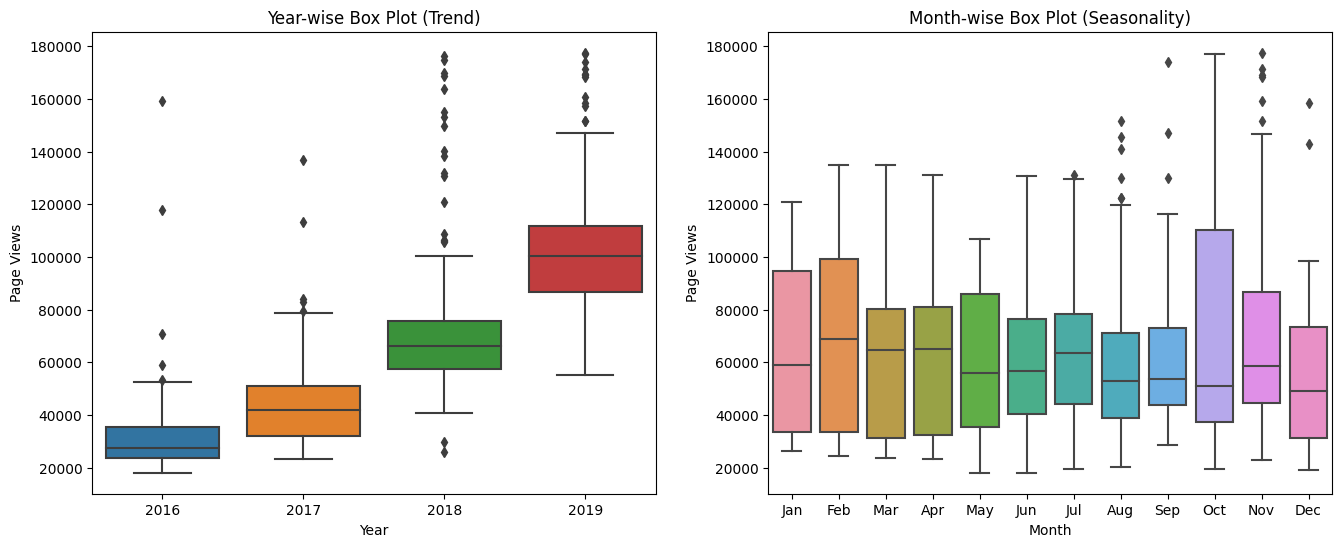

In [10]:
#Preparing data for boxplots
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

#drawing the box plot
df_box['monthnumber'] = df.index.month
df_box = df_box.sort_values('monthnumber')
fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.boxplot(y = "value", x = "year", data = df_box, ax = ax[0] ) 
ax[0].set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
sns.boxplot(y = "value", x = "month", data = df_box, ax = ax[1])
ax[1].set(xlabel="Month", ylabel="Page Views", title="Month-wise Box Plot (Seasonality)")